# Anggota Kelompok :

1.   Muhammad Azmi Falah 	(10122854)
2.   Mu'allim Ikmali 		(10122788)
3.   Hanif Nur Rahman 		(10122576)



# Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Tugas Kel 7/loan_data.csv')
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [ ]:
df.shape

(45000, 14)

# Tidak ada missing values

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# Menghapus data duplikat

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Mengecek apakah masih ada data yang masih terduplikat
duplicate_count = df.duplicated().sum()

In [ ]:
# Menampilkan apakah ada data yang duplikat
if duplicate_count == 0:
    print("Tidak ada data yang terduplikat")
else:
    print(f"Total data yang ada duplikat : {duplicate_count}")

Tidak ada data yang terduplikat


In [ ]:
print(df.shape)

(45000, 14)


In [ ]:
cat_cols = list(df.select_dtypes(include='O'))
num_cols = list(df._get_numeric_data())
target = 'loan_status'
initial_features = list(df.columns)

In [ ]:
for c in cat_cols:
    A = df[c].fillna('None').astype(str).unique()
    B = df[c].fillna('None').astype(str).unique()
    C = np.setdiff1d(B,A)
    if C.size>0:
        print(C)
        df.iloc[~df[c].isin(C), c ] = 'None'
    df[c] = df[c].astype('category')

CPU times: user 470 ms, sys: 6.39 ms, total: 476 ms
Wall time: 511 ms


Text(0.5, 1.03, 'Features')

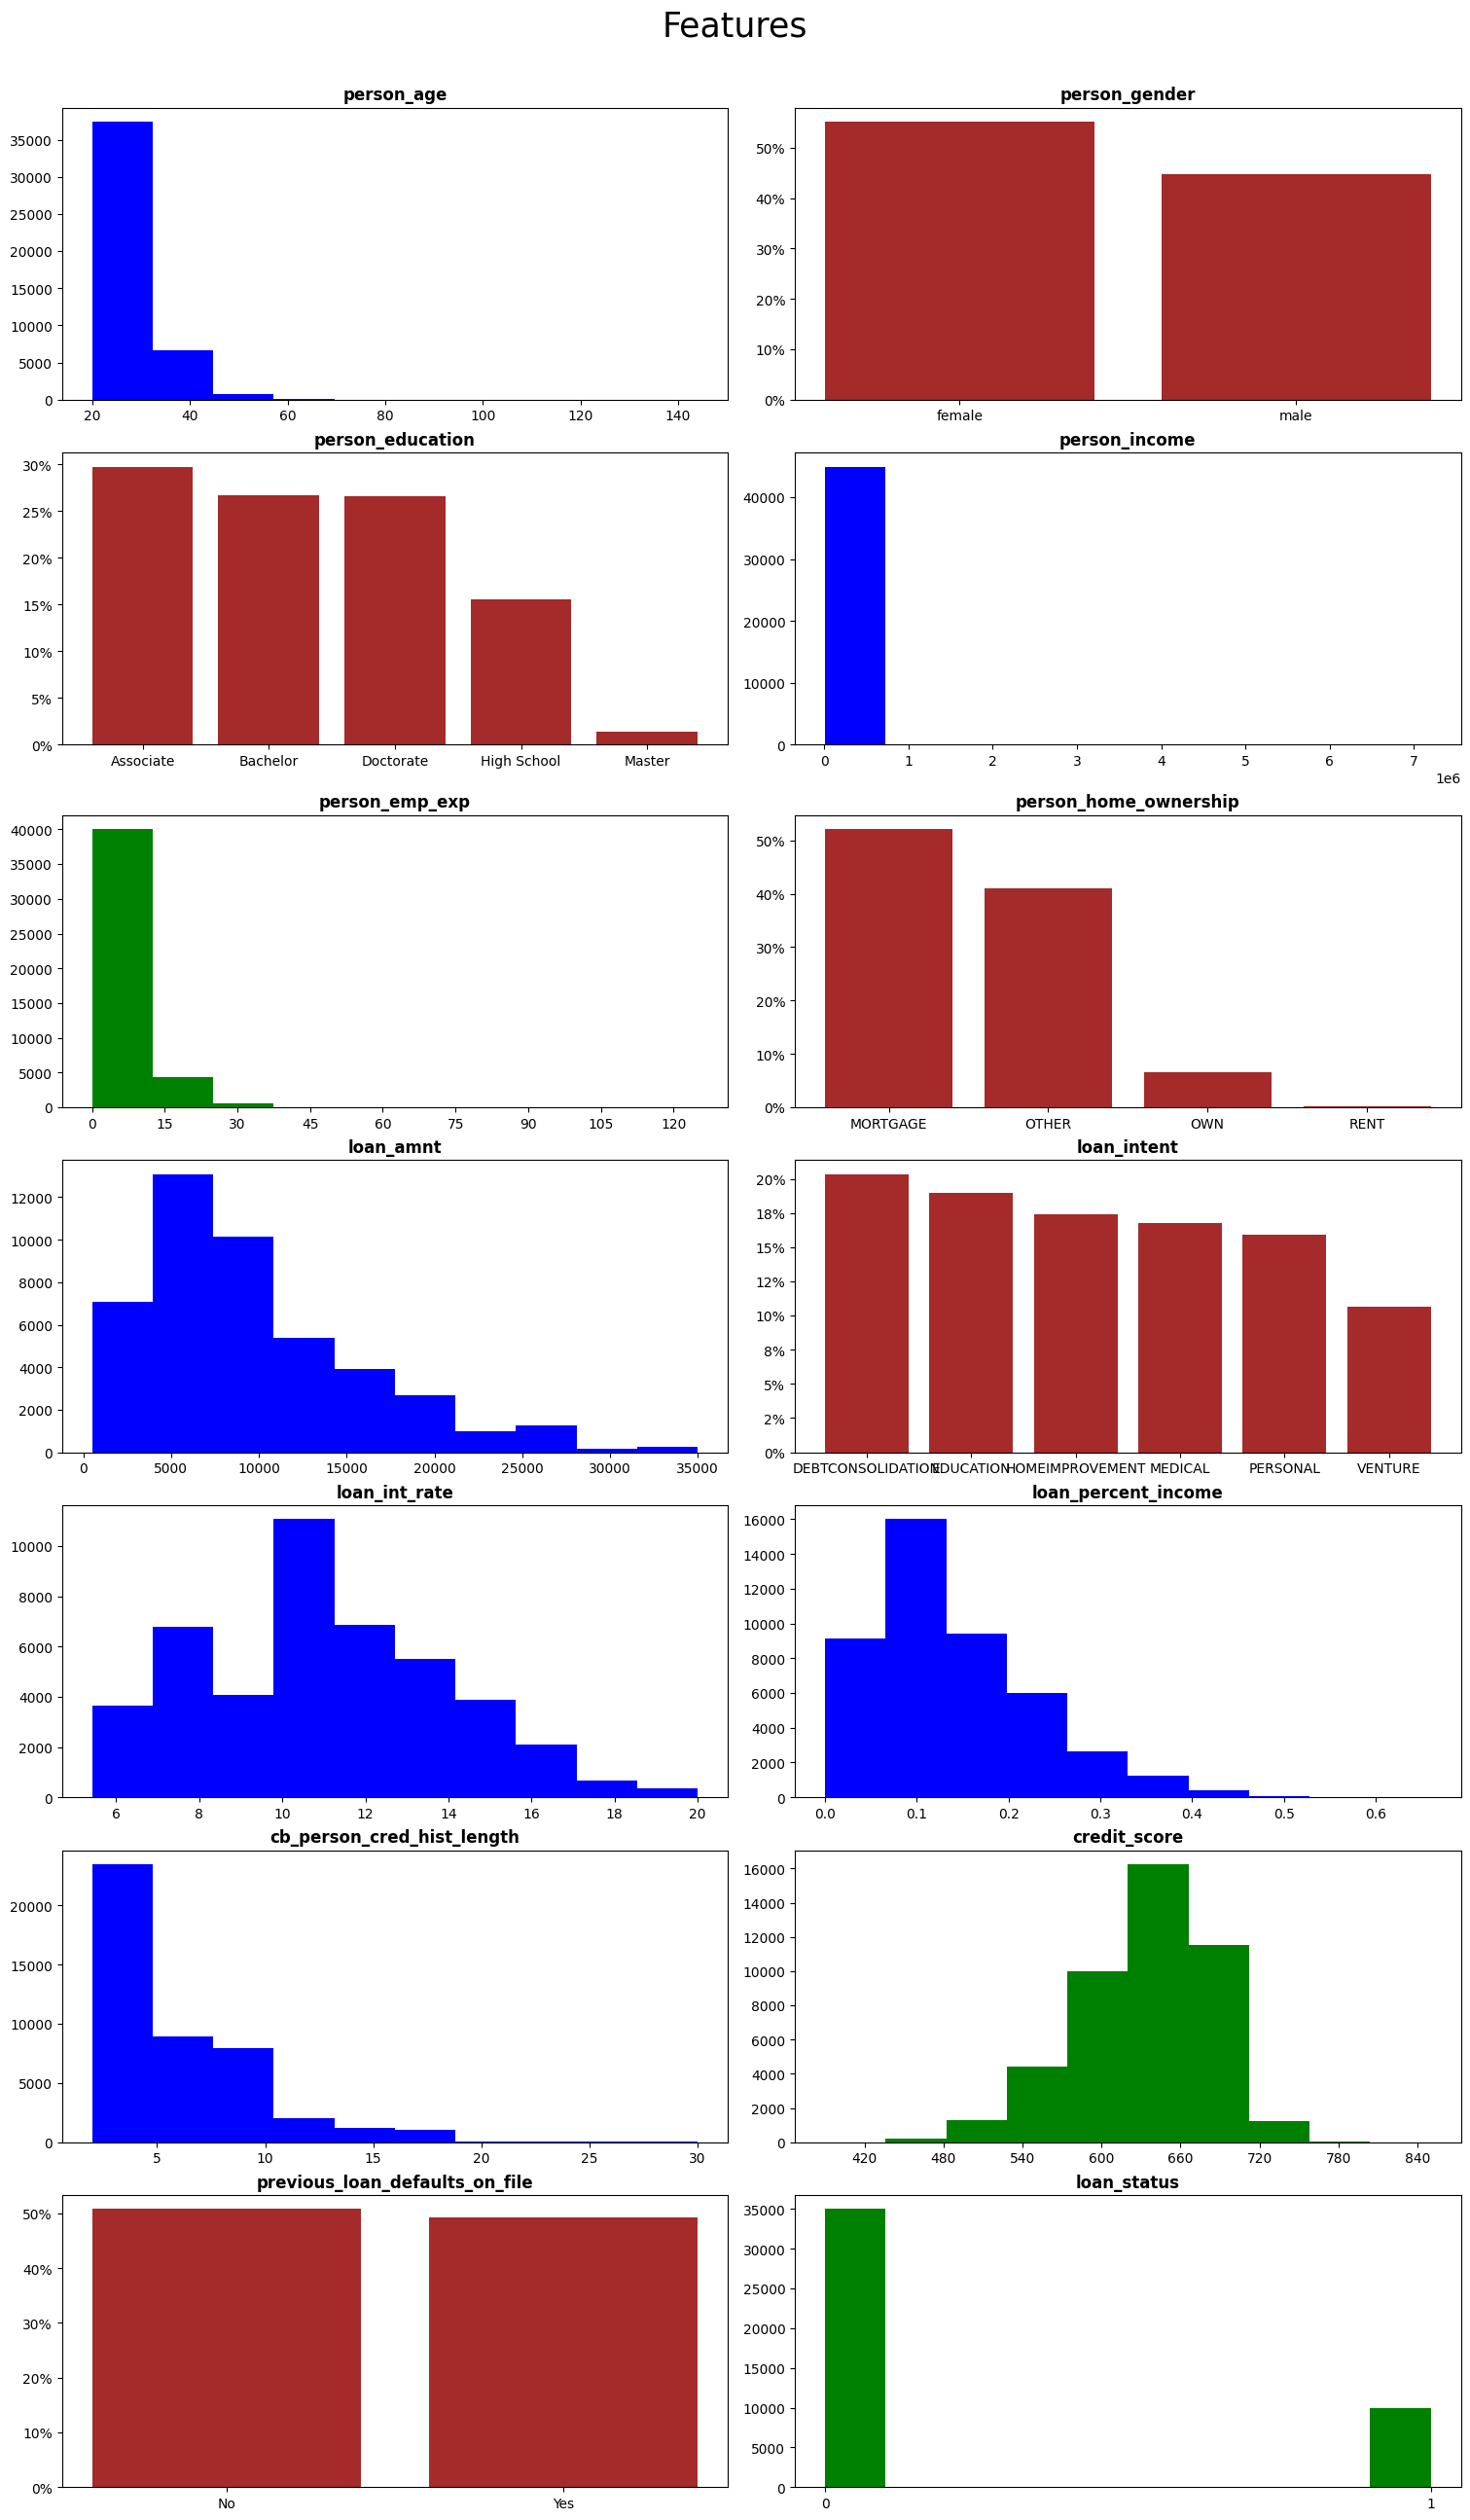

In [ ]:
%%time
from matplotlib.ticker import MaxNLocator

fig,axs= plt.subplots(7,2, figsize=(15,25),  constrained_layout=True)
for c, ax in zip(initial_features,axs.ravel()):
    if df[c].dtype=='float':
        ax.hist(df[c],color='blue')
    elif df[c].dtype=='category':
        vc = df[c].value_counts() / len(df)
        ax.bar(vc.index,vc, color='brown')
        ax.yaxis.set_major_formatter('{x:.0%}')
        if len(vc)<=15:
            ax.set_xticks(np.arange(len(df[c].dtype.categories)), df[c].dtype.categories)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
        else:
            ax.set_xticks([])
    elif df[c].dtype=='int64':
        ax.hist(df[c],color='green')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_title(f'{c}', fontweight='bold')
#axs.flat[-1].set_visible(False)
plt.suptitle('Features', y=1.03, fontsize=25);

# Menghilangkan outlier di Pandas dengan persentil

- Sebelum menghilangkan outlier

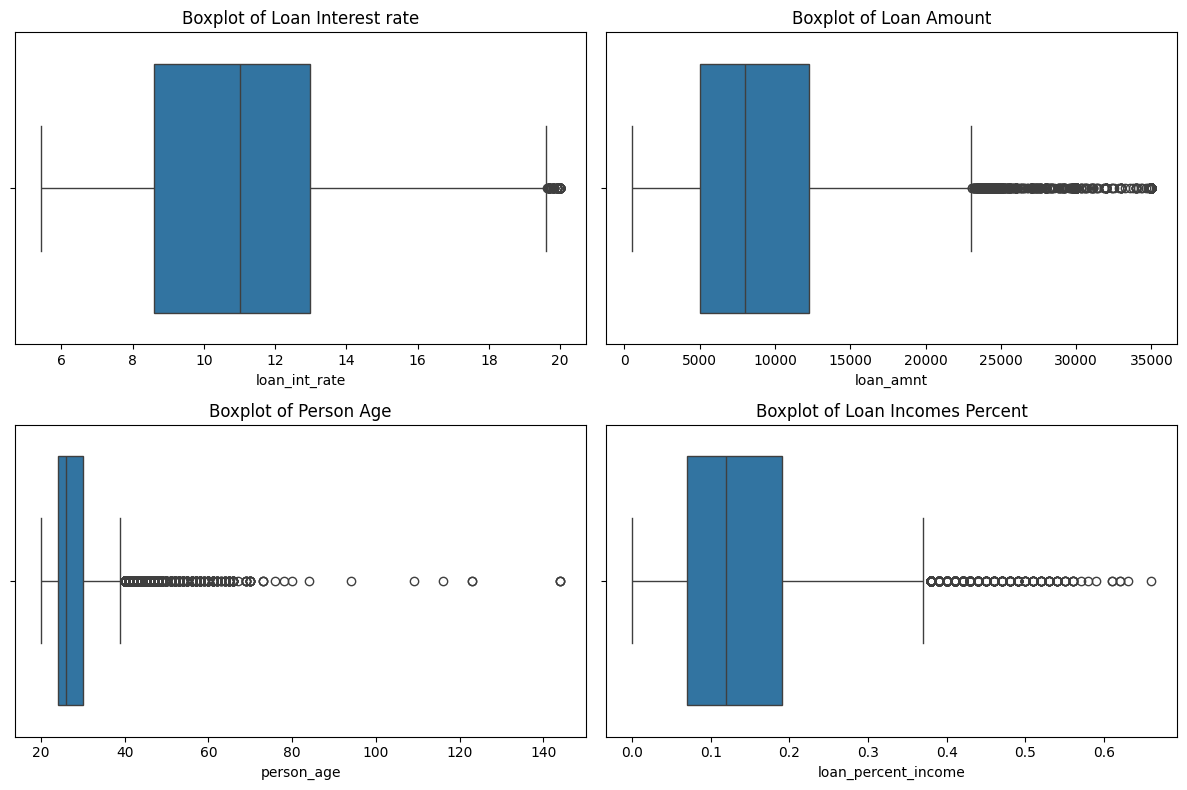

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['loan_int_rate'])
plt.title('Boxplot of Loan Interest rate')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['person_age'])
plt.title('Boxplot of Person Age')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['loan_percent_income'])
plt.title('Boxplot of Loan Incomes Percent')

plt.tight_layout()
plt.show()


In [ ]:
cols = ['person_age', 'loan_int_rate', 'loan_amnt','loan_percent_income', 'cb_person_cred_hist_length']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
print(df.shape)

(39513, 14)


- Setelah menghilangkan outlier

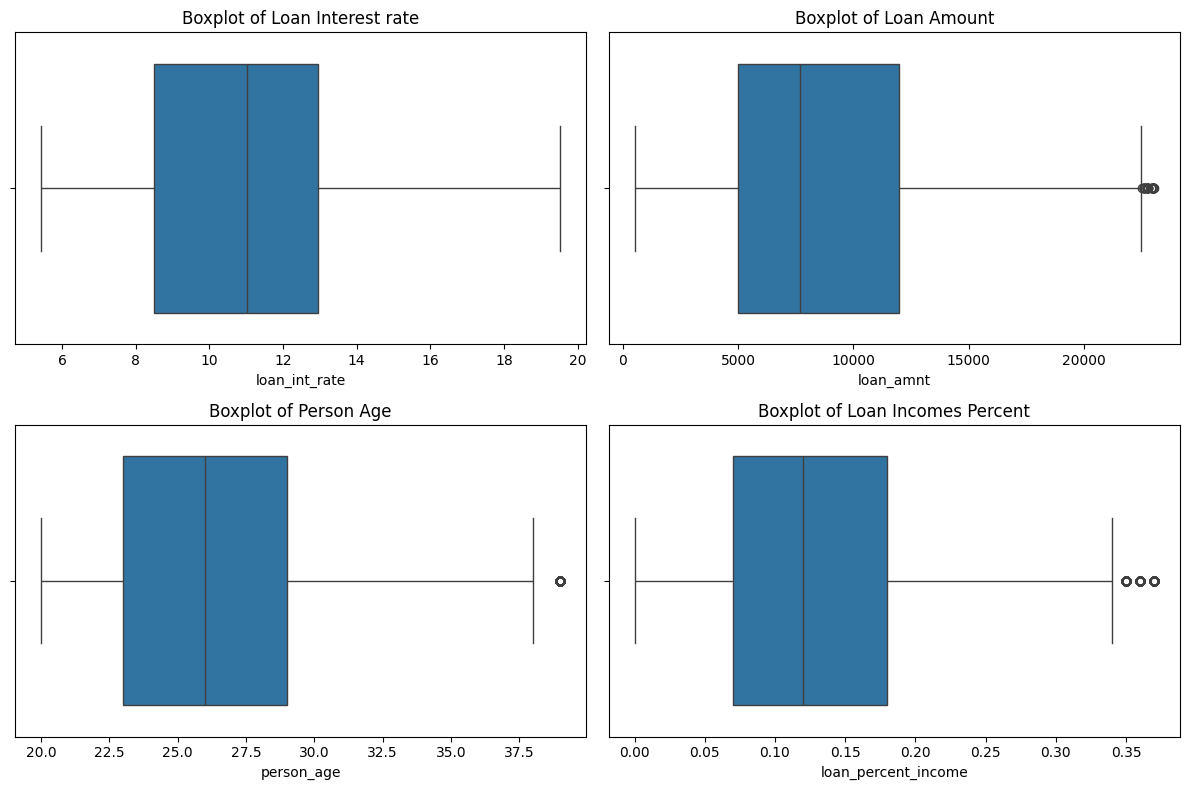

In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['loan_int_rate'])
plt.title('Boxplot of Loan Interest rate')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['person_age'])
plt.title('Boxplot of Person Age')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['loan_percent_income'])
plt.title('Boxplot of Loan Incomes Percent')

plt.tight_layout()
plt.show()

# Membuat data baru

In [ ]:
df_baru = df.dropna()
df_baru.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [ ]:
df_baru.to_csv('loan_data_baru.csv', index=False)

# Visualisasi EDA


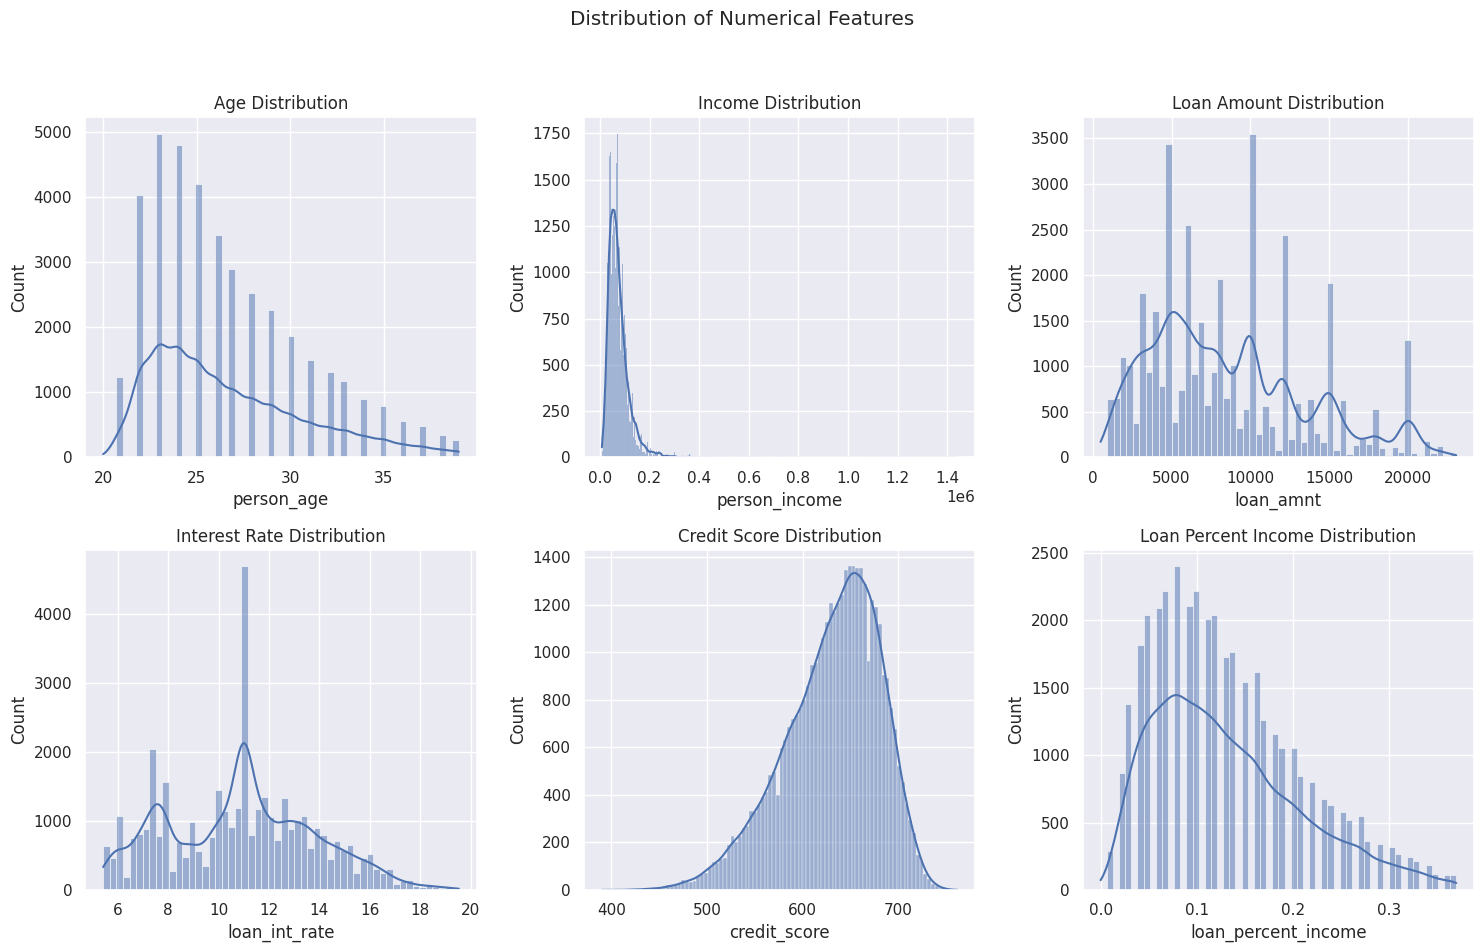

In [ ]:
# Visualizations for EDA

# Setting up the plot style
sns.set(style="darkgrid")

# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features')

# Age distribution
sns.histplot(df['person_age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Income distribution
sns.histplot(df['person_income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution')

# Loan amount distribution
sns.histplot(df['loan_amnt'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Loan Amount Distribution')

# Interest rate distribution
sns.histplot(df['loan_int_rate'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Interest Rate Distribution')

# Credit score distribution
sns.histplot(df['credit_score'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Credit Score Distribution')

# Loan percent income distribution
sns.histplot(df['loan_percent_income'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Loan Percent Income Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analisa Kategori

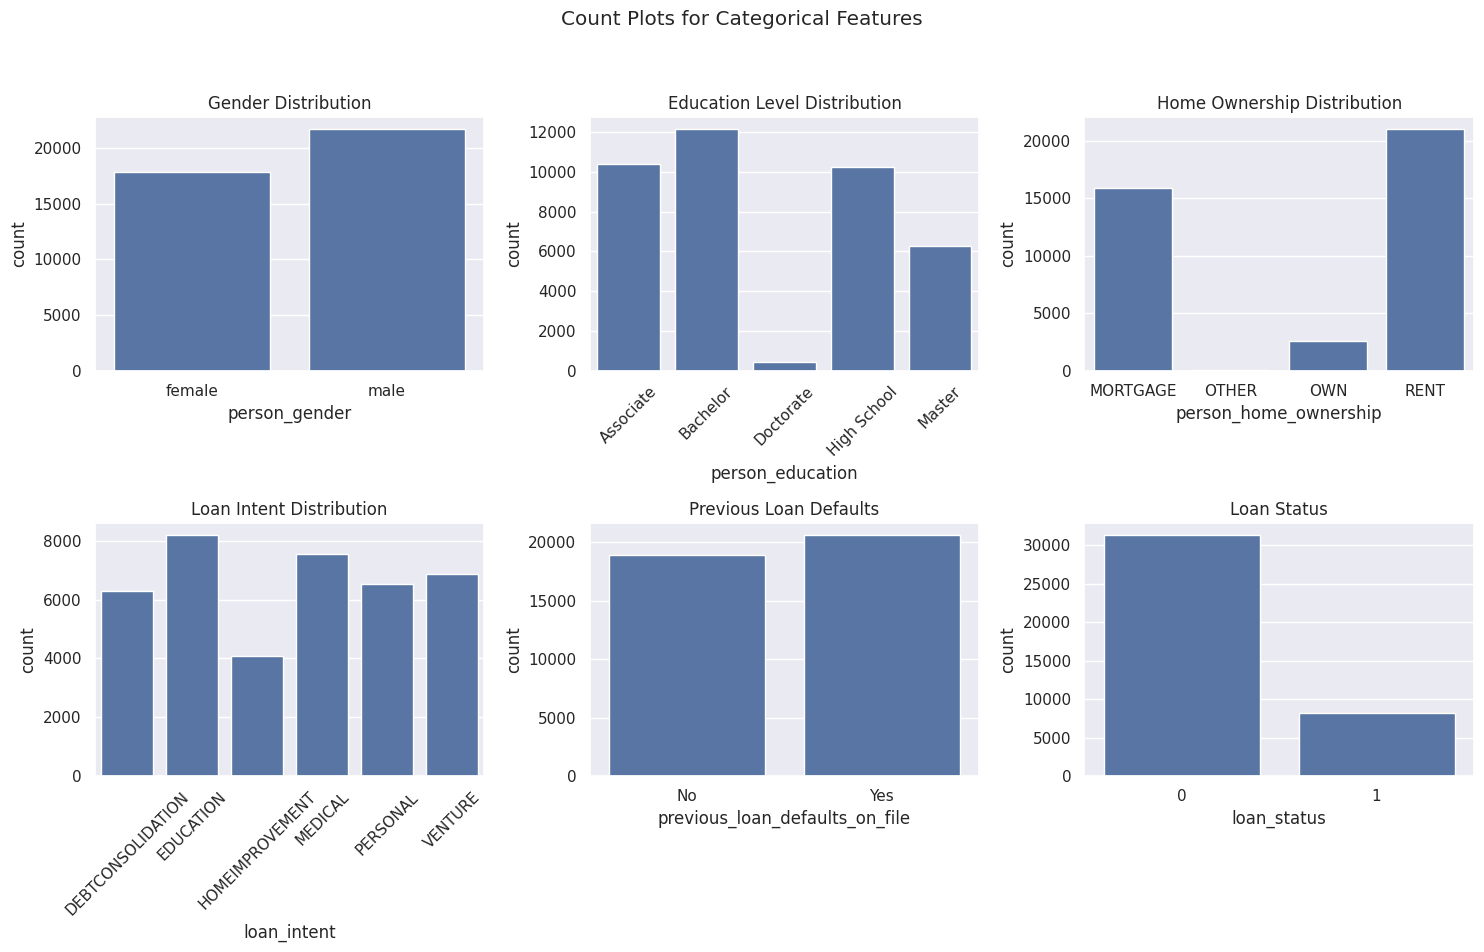

In [ ]:
# Categorical analysis: count plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Count Plots for Categorical Features')

# Gender distribution
sns.countplot(data=df, x='person_gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Education level distribution
sns.countplot(data=df, x='person_education', ax=axes[0, 1])
axes[0, 1].set_title('Education Level Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Home ownership distribution
sns.countplot(data=df, x='person_home_ownership', ax=axes[0, 2])
axes[0, 2].set_title('Home Ownership Distribution')

# Loan intent distribution
sns.countplot(data=df, x='loan_intent', ax=axes[1, 0])
axes[1, 0].set_title('Loan Intent Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Previous loan defaults
sns.countplot(data=df, x='previous_loan_defaults_on_file', ax=axes[1, 1])
axes[1, 1].set_title('Previous Loan Defaults')

# Loan status distribution
sns.countplot(data=df, x='loan_status', ax=axes[1, 2])
axes[1, 2].set_title('Loan Status')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Heatmap

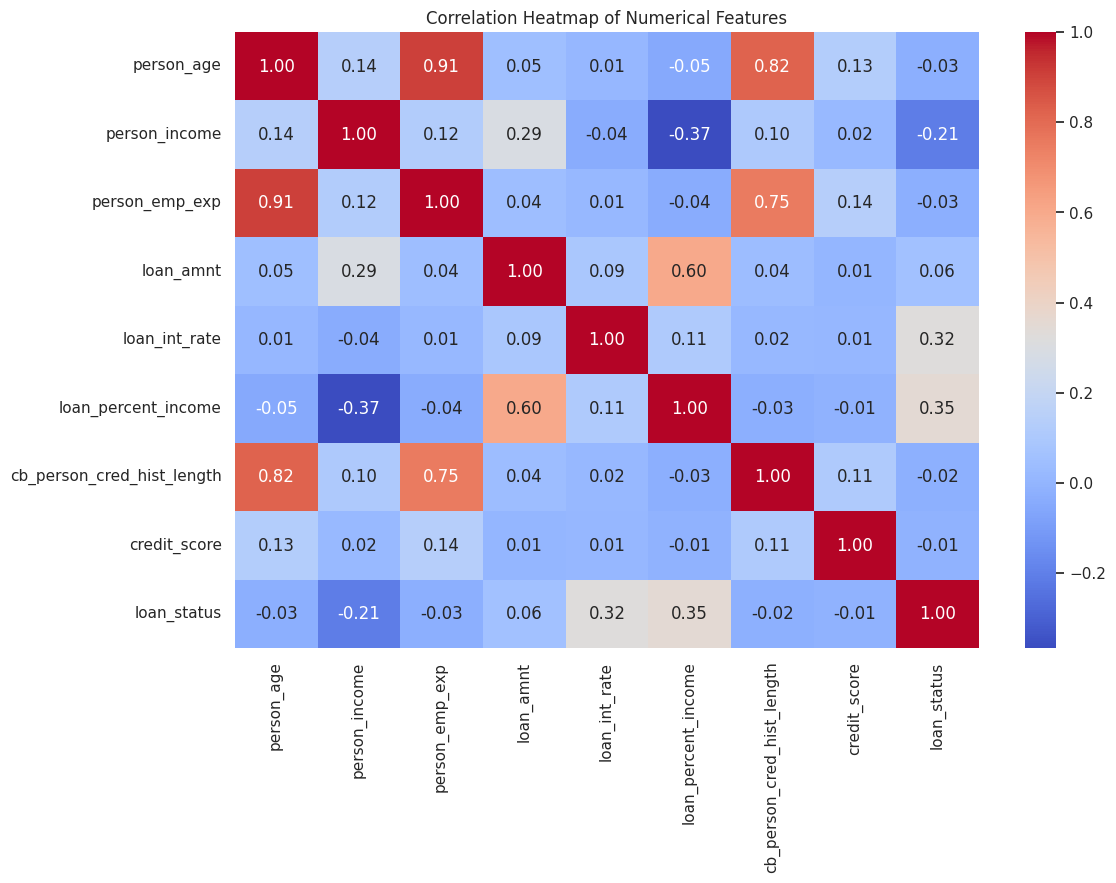

In [ ]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap to explore relationships among numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()

# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Split dataset menjadi test dan train

In [ ]:
# Select relevant columns for classification
features = ['person_age', 'person_gender', 'person_education', 'person_income',
            'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
            'credit_score', 'previous_loan_defaults_on_file']
target = 'loan_status'

# Separate features and target variable
X = df[features]
y = df[target]

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features

# Import train_test_split
from sklearn.model_selection import train_test_split # Importing the necessary function

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [ ]:
!pip install scikit-learn==1.2.2
from sklearn.preprocessing import RobustScaler

# Use RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Melihat model yang paling akurat

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9388
           1       0.88      0.74      0.81      2466

    accuracy                           0.93     11854
   macro avg       0.91      0.86      0.88     11854
weighted avg       0.92      0.93      0.92     11854



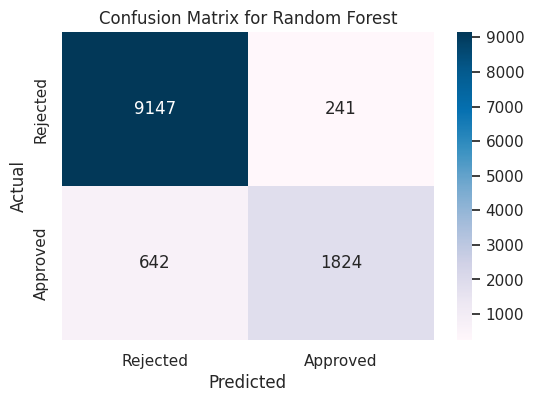



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9388
           1       0.78      0.72      0.75      2466

    accuracy                           0.90     11854
   macro avg       0.85      0.83      0.84     11854
weighted avg       0.90      0.90      0.90     11854



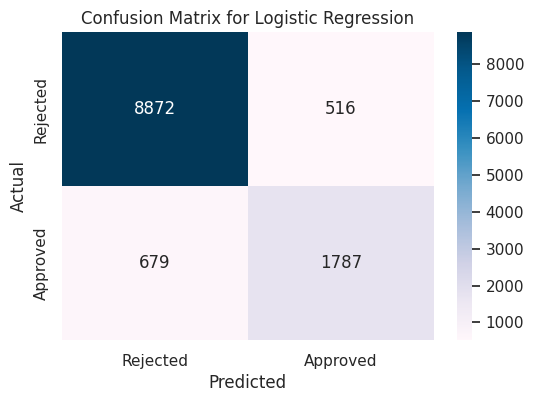



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9388
           1       0.76      0.76      0.76      2466

    accuracy                           0.90     11854
   macro avg       0.85      0.85      0.85     11854
weighted avg       0.90      0.90      0.90     11854



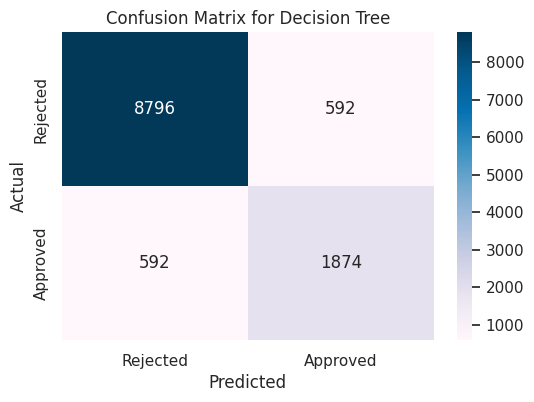



Classification Report for Support Vector Classifier:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9388
           1       0.84      0.73      0.78      2466

    accuracy                           0.92     11854
   macro avg       0.89      0.85      0.87     11854
weighted avg       0.91      0.92      0.91     11854



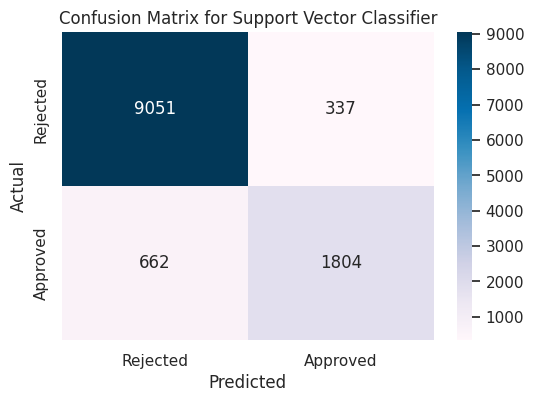



Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      9388
           1       0.79      0.67      0.73      2466

    accuracy                           0.90     11854
   macro avg       0.86      0.81      0.83     11854
weighted avg       0.89      0.90      0.89     11854



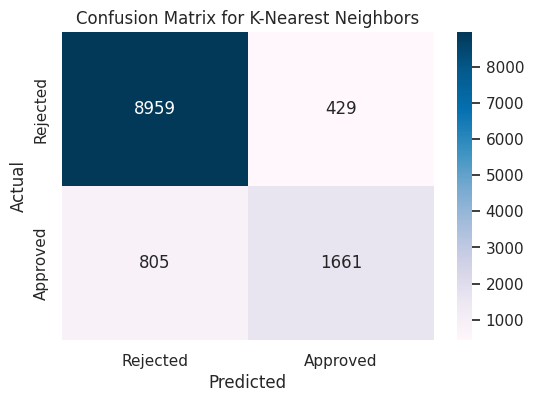

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:20:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9388
           1       0.88      0.79      0.83      2466

    accuracy                           0.93     11854
   macro avg       0.91      0.88      0.89     11854
weighted avg       0.93      0.93      0.93     11854



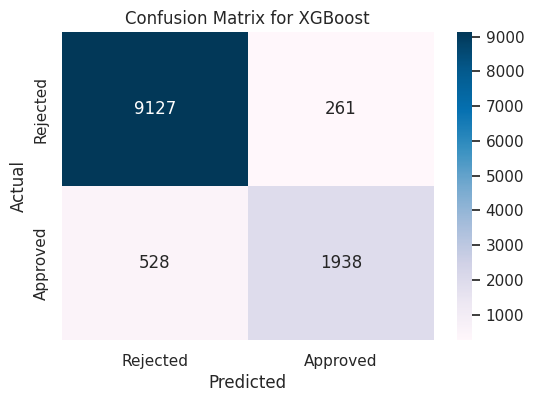



Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9388
           1       0.88      0.78      0.83      2466

    accuracy                           0.93     11854
   macro avg       0.91      0.88      0.89     11854
weighted avg       0.93      0.93      0.93     11854



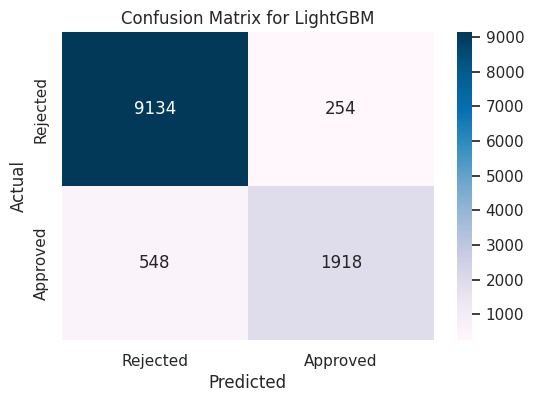



Classification Report for NaiveBayes:

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      9388
           1       0.45      0.97      0.61      2466

    accuracy                           0.75     11854
   macro avg       0.72      0.83      0.71     11854
weighted avg       0.88      0.75      0.77     11854



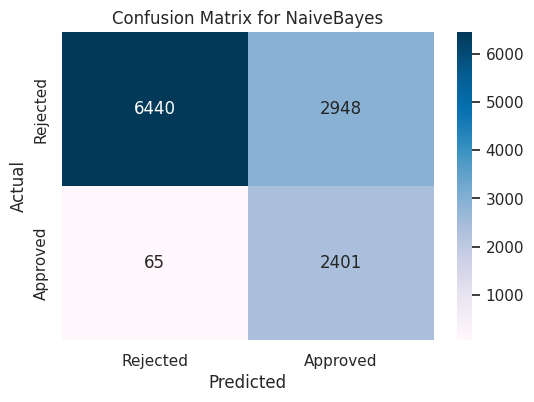



Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9388
           1       0.88      0.77      0.82      2466

    accuracy                           0.93     11854
   macro avg       0.91      0.87      0.89     11854
weighted avg       0.93      0.93      0.93     11854



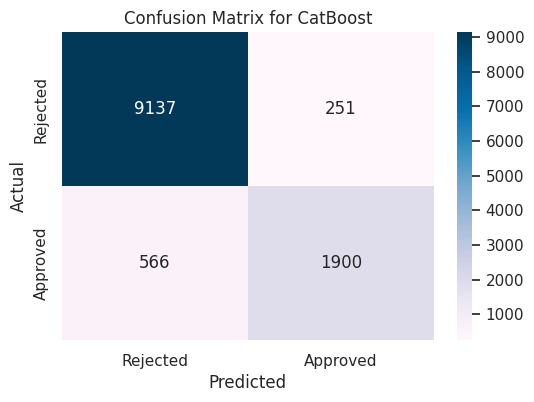



Model Performance Table:


,Model,Train Score,Test Score,Accuracy Score
0,Random Forest,1.000000,0.925510,0.925510
1,Logistic Regression,0.898586,0.899190,0.899190
2,Decision Tree,1.000000,0.900118,0.900118
3,Support Vector Classifier,0.924184,0.915725,0.915725
4,K-Nearest Neighbors,0.928920,0.895900,0.895900
5,XGBoost,0.974511,0.933440,0.933440
6,LightGBM,0.948697,0.932344,0.932344
7,NaiveBayes,0.748292,0.745824,0.745824
8,CatBoost,0.956000,0.931078,0.931078


In [ ]:
!pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42),
    "NaiveBayes": GaussianNB(),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_test)

    # Train and Test Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_val_pred)

    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })

    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)

    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

# Model terbaik untuk dataset ini

In [ ]:
best_model_row = results_df.loc[results_df['Accuracy Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy Score']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Best Model: XGBoost with Accuracy: 0.9334


# Menyiapkan environment

In [ ]:
# Install library jika belum terinstal
!pip install xgboost shap

# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import xgboost as xgb
import shap
import matplotlib.pyplot as plt


# Muat data

In [ ]:
# Ganti dengan path atau lokasi dataset Anda
df = pd.read_csv("loan_data_baru.csv")

# Tampilkan informasi dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39513 entries, 0 to 39512
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      39513 non-null  float64
 1   person_gender                   39513 non-null  object 
 2   person_education                39513 non-null  object 
 3   person_income                   39513 non-null  float64
 4   person_emp_exp                  39513 non-null  int64  
 5   person_home_ownership           39513 non-null  object 
 6   loan_amnt                       39513 non-null  float64
 7   loan_intent                     39513 non-null  object 
 8   loan_int_rate                   39513 non-null  float64
 9   loan_percent_income             39513 non-null  float64
 10  cb_person_cred_hist_length      39513 non-null  float64
 11  credit_score                    39513 non-null  int64  
 12  previous_loan_defaults_on_file  

# Pemisahan fitur dan target

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=["loan_status"])  # 'loan_status' adalah target
y = df["loan_status"]

# Bagi dataset menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Pelatihan model awal

In [ ]:
# Inisialisasi model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", enable_categorical=True)

# One-hot encoding for categorical features before training
X_train = pd.get_dummies(X_train,
                        columns=['person_gender', 'person_education',
                                 'person_home_ownership', 'loan_intent',
                                 'previous_loan_defaults_on_file'],
                        drop_first=True)
X_test = pd.get_dummies(X_test,
                       columns=['person_gender', 'person_education',
                                'person_home_ownership', 'loan_intent',
                                'previous_loan_defaults_on_file'],
                       drop_first=True)

# Latih model
model.fit(X_train, y_train)

# Evaluasi awal
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:20:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6267
           1       0.87      0.77      0.82      1636

    accuracy                           0.93      7903
   macro avg       0.91      0.87      0.89      7903
weighted avg       0.93      0.93      0.93      7903



# Hyperparameter Tuning dengan Grid Search

In [ ]:
# Parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Inisialisasi Grid Search
# Removed: enable_categorical=True as data is already one-hot encoded
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
)

# Jalankan Grid Search
grid_search.fit(X_train, y_train)

# Parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Model terbaik
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:20:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:21:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:21:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:21:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:21:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}


# Evaluasi model terbaik

In [ ]:
# Prediksi
y_pred_best = best_model.predict(X_test)

# Laporan klasifikasi
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# ROC-AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6267
           1       0.89      0.77      0.82      1636

    accuracy                           0.93      7903
   macro avg       0.91      0.87      0.89      7903
weighted avg       0.93      0.93      0.93      7903

Confusion Matrix:
[[6110  157]
 [ 382 1254]]
ROC-AUC Score: 0.9772354160009956


# Interpretasi model

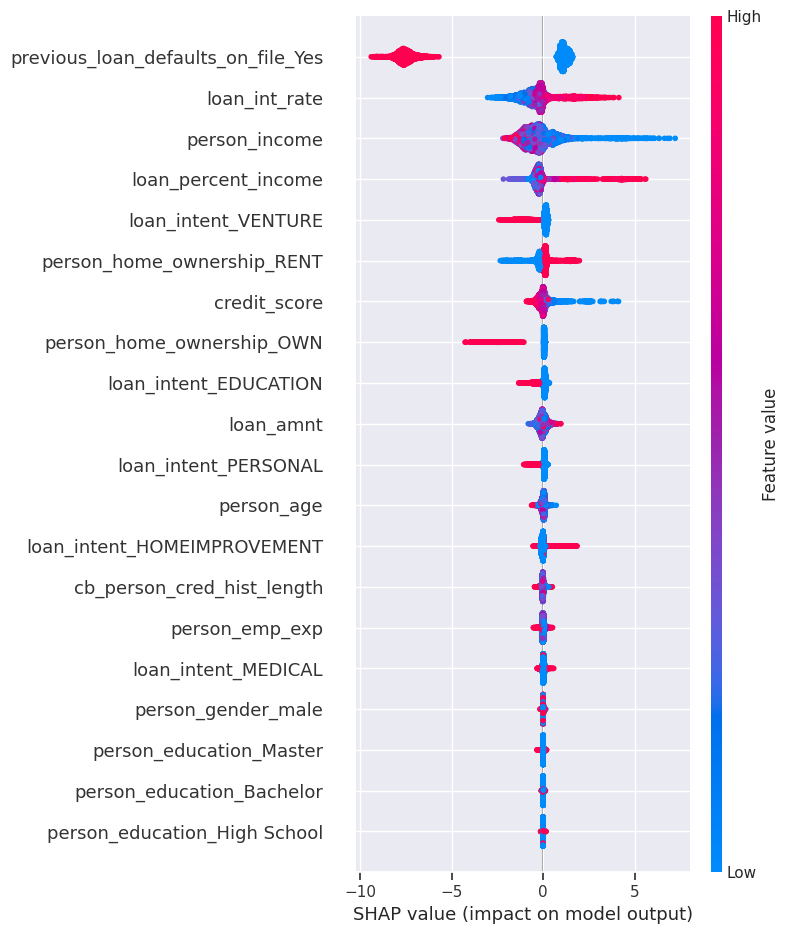

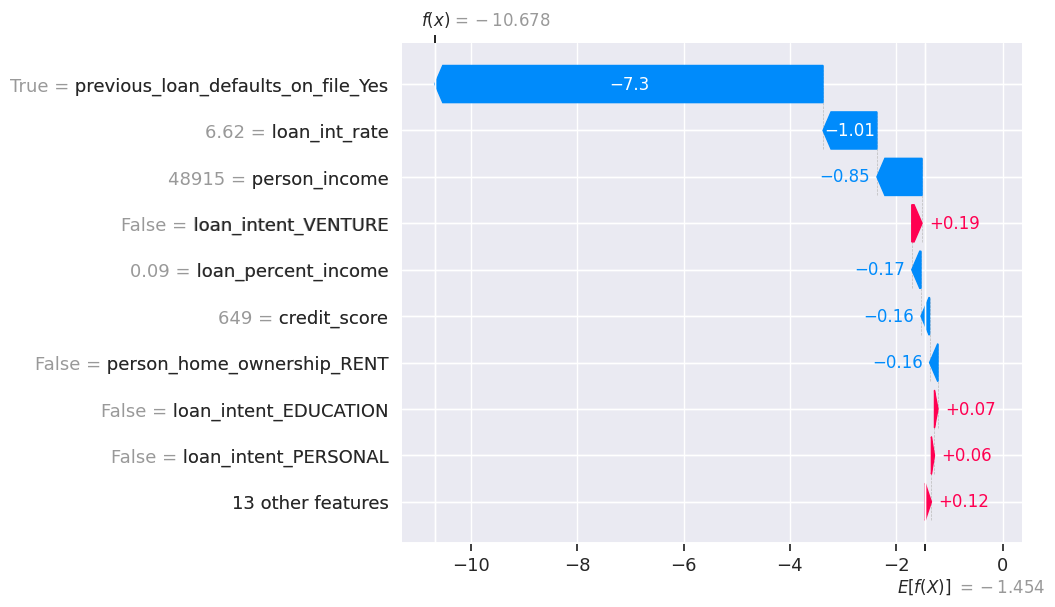

In [ ]:
# Inisialisasi SHAP
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# Visualisasi SHAP Summary
shap.summary_plot(shap_values, X_test)

# Visualisasi SHAP untuk satu sampel
shap.plots.waterfall(shap_values[0])


# Deployment

In [ ]:
import joblib

# Simpan model
joblib.dump(best_model, "xgboost_model.pkl")
print("Model saved as 'xgboost_model.pkl'")

Model saved as 'xgboost_model.pkl'


# Melihat kategeori loan yang approved dan not approved

Loan Status Categories:
   loan_status  counts
0            0   31333
1            1    8180


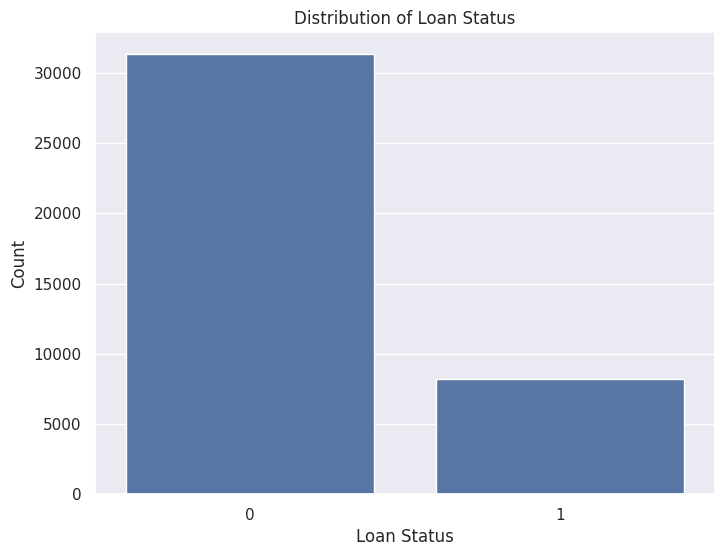

In [ ]:
df = pd.read_csv("loan_data_baru.csv")

loan_status_counts = df.groupby(['loan_status']).size().reset_index(name='counts')

print("Loan Status Categories:")
print(loan_status_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='loan_status', y='counts', data=loan_status_counts)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()